# Data cleanning process

This project was extracted form the Youtube channel of [*Codificando bits*](https://www.youtube.com/watch?v=bGnD1Ki7j-g) available in spanish. The [link](https://drive.google.com/drive/folders/1b1sfWDasyhiTwkZAhRtNQ2X37eKlhOIS) for the dataset is in Google Drive.

## 1. Busisness problem

A bank contract a Markenting company, in order to contact possible clients. They had to determine if they are or are not interested in adquire a product (a fix deposit with the bank).

So, What is the profile of our major or principal client?

# 2. Dataset

The information was recolected by the marketing company, and it can be find out in the CSV file (dataset_banco.csv)
The specific number of our dataset. It has

- 17 columns
- 45215 rows

Each register(row: the persons were contacted by the marketing companay) has 16 features (the first 16th columns) and one categorical ("yes" or "no" that depends if the person is interested to adquire the product).

The 17 columns (features) are:

1. "age":  edad (numeric)
2. "job": type of work (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services") 
3. "marital": civil status (categorical: "married", "divorced", "single")
4. "education": education level (categorical: "unknown", "secondary", "primary", "tertiary")
5. "default": if left to pay its obligation (categorical: "yes", "no")
6. "balance": money annual balance in euros (numeric)
7. "housing": Do you have a mortgage credit? (categorical: "yes", "no")
8. "loan": Do you have a cosumer loans? (categorical: "yes", "no")
9. "contact": medium that person was contacted (categorical: "unknown", "telephone", "cellular") 
10. "day": the last day that person was contacted (numeric)
11. "month": the last month that person was contacted (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": length of time (in seconds) of the last contact (numeric)
13. "campaign": total number of times of the person was contacted during the campaing (numeric)
14. "pdays": number of days elapsed after the person was being contacted before the actual campaign (numeric. -1 indica que no fue contactado previamente)
15. "previous": number of times that the person had being contacted before this campaign (numeric)
16. "poutcome": result of the las marketing campaign (categorical: "unknown", "other", "failure", "success")
17. "y": categorical Did the client subscribe to the product (fix deposit) ?  cliente se suscribió a un depósito a término? (categorical: "yes", "no")

# 3. Looking the dataset

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# reading the data
path = "data\dataset_banco.csv"
data = pd.read_csv(path)

In [3]:
# some general characteristic

print(data.shape) # give us the number of "(rows, columns)"
data.head() # give us the first 5 rows 

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
# See the categorical or numeric variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


# 4. Cleanning

Now we are doing the cleanning of the dataset, we can be some possible situation

1. Some missing data in some shel
2. Some irrelevant columns (that depends on the problem to solve)
3. Some repeated rows
4. Some extreme values (outliers), only for numerical values. We need to analize in detail how to resolve them.
5. Some typos in the categorical variables

After this process, we will have a clean dataset that it is ready to do the EDA (exploratory data analysis)

## 4.1 Missing data

First, we remind the information of the dataset

In [17]:
# Information of data

print(data.shape)
data.info()

(45215, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


As we can see, the dataset contains 45215 rows. But, the info showed, for example for the columns: *job*, *marital*, *education*, *balance*, *duration* and *pdays* have a few number of rows missed!

However, the info could not show the all missed quantities. For a complete, we need to be sure if there are some "NaN" values. For this propouse we use the next line:

In [18]:
# check NaN values

check_nan_in_data = data.isnull().values.any()
print(check_nan_in_data)

True


So we have "NaN" values inside the dataset! We must count them. We use the next code

In [19]:
# Count NaN values

count_nan_values_in_data = data.isnull().sum().sum()
print(count_nan_values_in_data)

8


And the NaN values by column

In [9]:
# Count NaN values by column

data.isnull().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

Finally, we see that those rows to be eliminate are not the same! So, in total, is correct to eliminate 8 columns. But, they were a few data missed, we decided to eliminate each corresponded rows:

In [20]:
# Eliminate rows of missed values

data.dropna(inplace=True)   #Eliminate the all row. "inplace=True", means that the rewrite over "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


now, all the columns have 45207 rows. 

## 4.2 Irrelevant columns

An irrelevant column could be:

- A column **that has non-relevant information to solve this problem**. For example, in this case, they might be columns that are not related  with the possible client's profile (favorite sports, hobbie, favorite food, etc).
- **A categorical column with just one level**. For example, if the column "job" has one level: "unknown".
- **A numerical column with hist one value**. For example, if the column "age" have all equal values: "50".
- **Columns with redundant information**. For example, if in addition of the columns "month" and "day", we might have "month-day", it is a result of combine the previous two columns.

If we have doubts if some column might be relevant or not, the optimal option is **not** discarded (in below steps, we be able to know  if them could be preseve or not).

In this case, all the columns could be relevant in this problem. But we must check if some categorical column have just one level or a categorical column with one value.

In [12]:
# Count of level for categorical columns

cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
    print(f'Column {col}: {data[col].nunique()} sublevel')

Column job: 18 sublevel
Column marital: 6 sublevel
Column education: 10 sublevel
Column default: 2 sublevel
Column housing: 2 sublevel
Column loan: 6 sublevel
Column contact: 5 sublevel
Column month: 12 sublevel
Column poutcome: 6 sublevel
Column y: 2 sublevel


As we can appreciate, all the colums have more thant two levels. So, we must not eliminate nothing.

Now we check the numerical columns:

In [13]:
# How to see numerical columns

data.describe() # if the standard deviation "std" are zero, this means that all values in this columns are equal!

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


We see the standard deviatio *"std"* are different of zero, so this means that all columns have different values.

Therefore, we preserve all the numerical values.

## 4.3 Repeated rows

In [21]:
print(f'Size of the set before eliminate the repeated rows: {data.shape}')
data.drop_duplicates(inplace=True)

print(f'Size of the set after eliminate the repeated rows: {data.shape}')

Size of the set before eliminate the repeated rows: (45207, 17)
Size of the set after eliminate the repeated rows: (45203, 17)


this cleanning, reduce only 3 rows!.

## 4.4 Outliers for numerical variables

**Not in all cases, we have to eliminate the outliers**, because it someimes contains some important information.

Now we create some plot like "boxplot" of numerical columns:

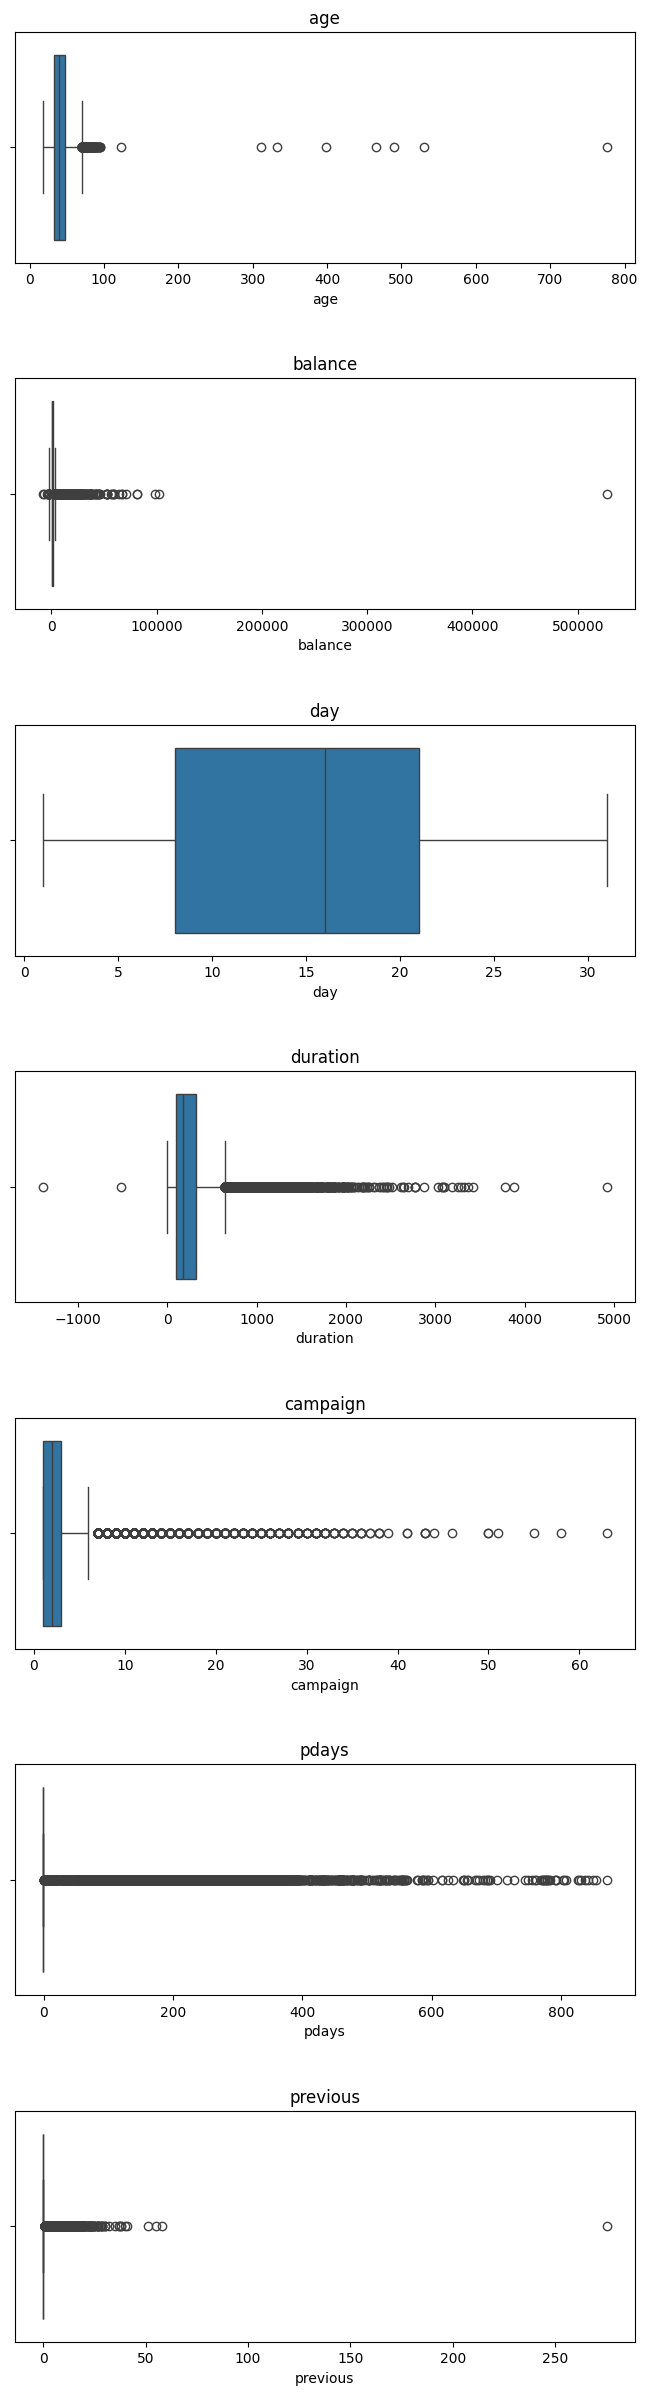

In [22]:
# Generate individual plot for the numerical variables, they are in different ranges

cols_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i]) # "boxplot" can allow us to see the outliers points
    ax[i].set_title(col)

**Observations**
- 'age': there are people with ages greater than 100 years old.
- 'duration': there are negative values (in seconds); these make not sense.
- 'previous': there is a extreme value (close to 300)

In [23]:
# Eliminate the age rows with 'age'>100

print(f'Size of the dataset before eliminate the rows of age : {data.shape}')
data = data[data['age']<=100]
print(f'Size of the datase after eliminate the rows of age : {data.shape}')

Size of the dataset before eliminate the rows of **age** : (45203, 17)
Size of the datase after eliminate the rows of **age** : (45195, 17)


In [25]:
# Eliminate the rows with 'duration'<0

print(f'Size of the dataset before eliminate the rows of duration: {data.shape}')
data = data[data['duration']>0] # We preserve the values that greater of 0
print(f'Size of the dataset after eliminate the rows of duration: {data.shape}')

Size of the dataset before eliminate the rows of duration: (45194, 17)
Size of the dataset after eliminate the rows of duration: (45189, 17)


In [26]:
# Eliminate the rows with 'previous'>100

print(f'Size of the dataset before eliminate the rows of previous: {data.shape}')
data = data[data['previous']<=100] # We preserve the values that lower of 100
print(f'Size of the dataset after eliminate the rows of previous: {data.shape}')

Size of the dataset before eliminate the rows of previous: (45189, 17)
Size of the dataset after eliminate the rows of previous: (45189, 17)


## 4.5 Typos of categorical variables

In a categorical variable, we can find some sub-level as "unknown" and "UNK", for us, these values are the same but in our program are different.